# <center>Hands on Linear Regression</center>

I looked for retrieving from scratch some basic linear regression elements with a simple data set.  
I used *sklearn* to check and compare my results.

In [1]:
# Importing usefull packages and modules
import math
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import norm

Importing “invest.txt” data set with panda.

In [2]:
# Specifying the data file location
file_location = './invest.txt' 

# Creating dataFrame with panda
df = pd.read_csv(file_location, sep=' ',
                 usecols=["year","gnp","invest","cpi","interest"])

# Displaying the first 5 rows
df.head()

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### Step one: uni-dimensional regression
First I proceed to a basic uni-dimensional linear regression, with *invest* as the observation data and *GNP* as a single explanatory variable.

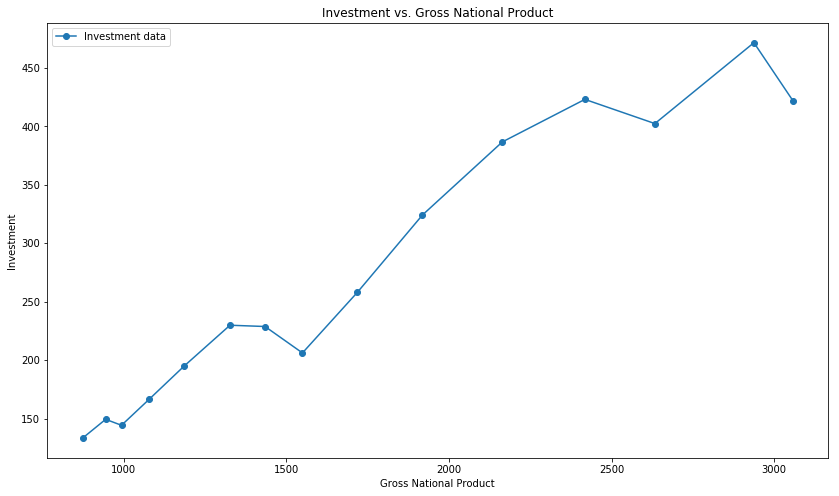

In [3]:
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df['gnp'],df['invest'], '-o', label='Investment data')

# Adding a title and axes labels
ax.set_title('Investment vs. Gross National Product')
ax.set_xlabel('Gross National Product')
ax.set_ylabel('Investment')

plt.legend()
plt.show()

In [4]:
# Logarithmic transformation
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])

I retrieve linear regression main elements (slope, intercept, standard errors) by hand.

In [5]:
x = df['gnp']
xm = np.mean(x)

y = df['invest']
ym = np.mean(y)

# Slope and intercept obtained with CNO
slope = ((x-xm) * (y-ym)).sum() / ((x-xm) ** 2).sum()
intercept = ym - slope * xm

# Predicted values obtained with the model
y_pred = slope * x + intercept

# Degrees of freedom in 2D
n = len(df.index)
dof = n-2

# Regression standard error
regr_se = np.sqrt(np.sum((y-y_pred) ** 2) / dof)

# Standard error for the slope
slope_se = regr_se / np.sqrt(np.sum((x-xm) ** 2))

# Standard error for the intercept
intercept_se = slope_se * np.sqrt(np.sum(x ** 2) / n)

# Coefficient of determination
r2 = ((y_pred-ym) ** 2).sum() / ((y-ym) ** 2).sum()

print('Estimated intercept: %.3f' % (intercept))
print('Intercept standard error: %.3f' % (intercept_se))
print('Estimated slope: %.3f' % (slope))
print('Slope standard error: %.3f' % (slope_se))
print('Coefficient of determination: %.3f' % (r2))

Estimated intercept: -1.964
Intercept standard error: 0.410
Estimated slope: 1.015
Slope standard error: 0.055
Coefficient of determination: 0.963


Testing null coefficient hypothesis for the slope.

In [6]:
# Test statistic for real slope=0
test_stat = slope/slope_se
print('test statistic : %.3f' %(test_stat))

# Getting p value with scipy stat module
p_value = 2 * (1 - stats.t.cdf(np.abs(test_stat), dof))
print('p_value : ', p_value)

test statistic : 18.332
p_value :  1.1363709973011282e-10


The p_value is really close to zero, one can reject the null hypothesis and say that the coefficient is significant.

I plot of the regression line, as well as the confidence intervals and prediction intervals at 90%.

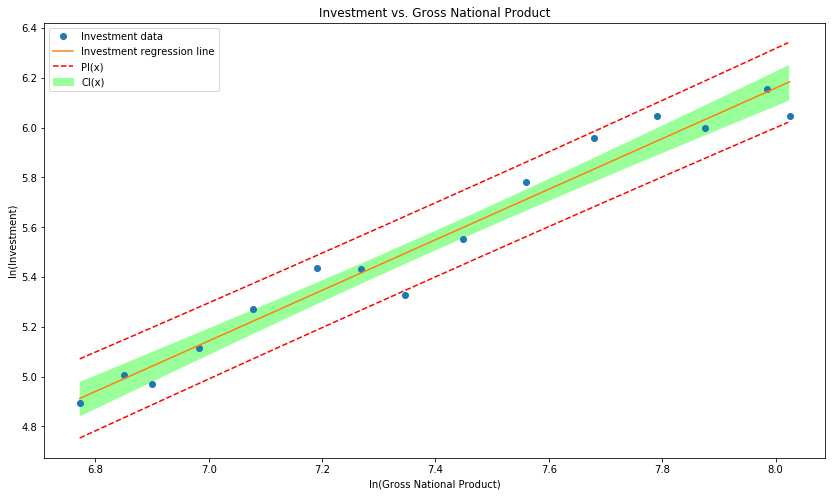

In [7]:
# construction of an interval to evaluate CI and PI
x_eval = np.arange(np.min(x), np.max(x), 0.05)
y_eval =  slope * x_eval + intercept

# quantile for 90% level
alpha = 0.1
q = norm.ppf(1 - alpha/2)

# CI
CI = q * regr_se * np.sqrt(1/n + (x_eval-np.mean(x)) ** 2 / np.sum((x-np.mean(x)) ** 2))

# PI
PI = q * regr_se * np.sqrt(1 + 1/n + (x_eval-np.mean(x)) ** 2 / np.sum((x-np.mean(x)) ** 2))

fig, ax = plt.subplots(figsize=(14,8))

# Data
ax.plot(df['gnp'], df['invest'], 'o',
        label='Investment data')

# Regression line
ax.plot(df['gnp'], slope*df['gnp'] + intercept,
        label='Investment regression line')

# CI and PI
ax.fill_between(x_eval, y_eval-CI, y_eval+CI, color="#99ff99",
                label='CI(x)')

ax.plot(x_eval, y_eval+PI, 'r--')
ax.plot(x_eval, y_eval-PI, 'r--',
        label='PI(x)')

# Adding a title and axes labels
ax.set_title('Investment vs. Gross National Product')
ax.set_xlabel('ln(Gross National Product)')
ax.set_ylabel('ln(Investment)')

plt.legend()
plt.show()

Here I check with sklearn that the values correspond to mine.

In [8]:
# Create linear regression object with linear_model from sklearn
model = linear_model.LinearRegression()
model.fit(df[['gnp']], df['invest'])

# Displaying results
string_match = '\nMatch the calculated value: '

print('Intercept : %.3f' % (model.intercept_)
      + string_match
      + str(np.isclose(intercept, model.intercept_)) + '\n')

print('Slope : %.3f' % (model.coef_)
      + string_match
      + str(np.isclose(slope, model.coef_)) + '\n')

# Using 'score' to obtain coefficient of determination
model_r2 = model.score(df[['gnp']],df['invest'])
print('Coefficient of determination : %.3f' % (model.coef_)
      + string_match
      + str(np.isclose(r2, model_r2))
      + '\n')

# Comparison for a predicted value
predicted_invest = slope*np.log(1000) + intercept
model_predected_value = model.predict([[np.log(1000)]])
print('Predicted investment for GNP = 1000 : %.3f'
     % (model_predected_value))
print(string_match + str(np.isclose(model_predected_value, predicted_invest)))

Intercept : -1.964
Match the calculated value: True

Slope : 1.015
Match the calculated value: [ True]

Coefficient of determination : 1.015
Match the calculated value: True

Predicted investment for GNP = 1000 : 5.050

Match the calculated value: [ True]


**Conclusion:** with the  LinearRegression() from sklearn.linear_model, all calculated values match!

# Step two: 2 dimensional regression
Let's proceed to a 2 dimensional regression, with *gnp* and *interest* as the two explanatory variables for *invest*.

In [9]:
# Creating X matrix
X0 = df[['gnp', 'interest']].values
ones = np.ones((len(df.index), 1))
X = np.hstack([ones,X0])

# Gram matrix
Gram = X.T.dot(X)

print('Gram matrix rank : %2d' % (np.linalg.matrix_rank(Gram)))
if np.linalg.matrix_rank(Gram) == 3:
    print('Gram matrix is a full rank matrix.')

Gram matrix rank :  3
Gram matrix is a full rank matrix.


For the regression of *invest* on *GNP* and *interest*, I estimate by hand the 3 coefficients and their standard deviations, as well as the coefficient of determination.  
In addition, as I did for the uni-dimensional regression, I proceed to a Student test for the significance of each coefficient.

In [10]:
# Regression coefficients
theta = np.linalg.solve(X.T.dot(X), X.T.dot(df['invest']))
print('Regression coefficients: %.3f %.3f %.3f' % (theta[0], theta[1], theta[2]))

Y = df['invest']
Y_mean = np.mean(Y)
Y_pred = X.dot(theta)

# Degrees of freedom
n = len(df.index)
dof = n - np.linalg.matrix_rank(X)

# Noise estimation
sigma2 = 1/dof * (Y-Y_pred).dot(Y-Y_pred)

# Regression standard error
se = np.sqrt(sigma2)

# Covariance Matrix
inv_gram = np.linalg.inv(Gram)
cov_matrix = sigma2*inv_gram
coefficients_standard_errors = np.sqrt(np.diag(cov_matrix))
print('Coefficients standard errors : %.3f %.3f %.3f' % (coefficients_standard_errors[0],
                                                        coefficients_standard_errors[1],
                                                        coefficients_standard_errors[2]))

# Student tests
test_stats = theta/coefficients_standard_errors
print('test statistics : %.3f %.3f %.3f' % (test_stats[0], test_stats[1], test_stats[2]))

# Getting p values with scipy stat module
p_values = 2 * (1 - stats.t.cdf(np.abs(test_stats), dof))
print('p_values : %.3f %.3f %.3f' % (p_values[0], p_values[1], p_values[2]))

# Coefficient of determination
r2 = 1 - (Y-Y_pred).dot(Y-Y_pred) / (Y-Y_mean).dot(Y-Y_mean)
print('Coefficient of determination : %.3f' % r2)

Regression coefficients: -2.180 1.051 -0.007
Coefficients standard errors : 0.662 0.102 0.015
test statistics : -3.292 10.300 -0.425
p_values : 0.006 0.000 0.678
Coefficient of determination : 0.963


*Results are displayed by columns (first column for the intercept, then for each coefficient).*<br>
p_value for gnp coefficient is really close to zero. It is significant and can be taken as a strong assumption against the null hypothesis.  
On the other hand with the p_value for interest is far greater than 0.1. One cannot make a presumption against the null hypothesis here.

I plot the data, the regression "plan" and the corresponding surfaces of the confidence intervals at 99.9%, but this time in a three-dimensional graph.

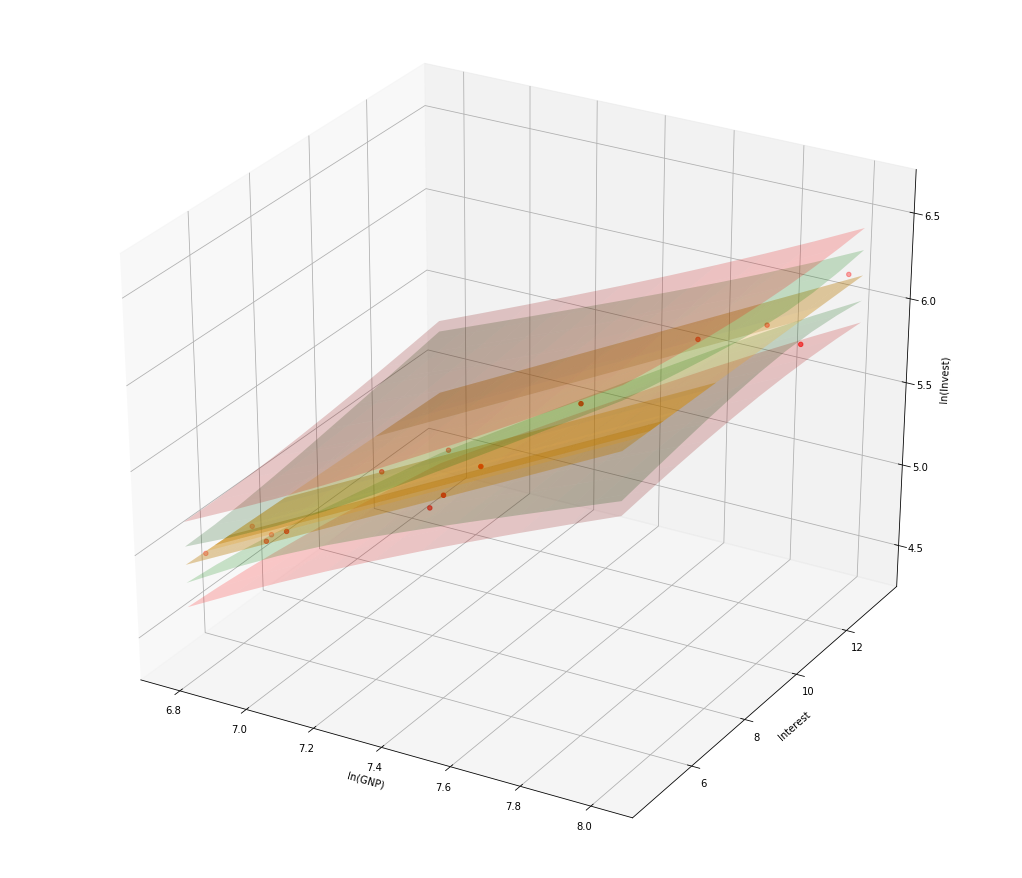

In [11]:
fig = plt.figure(figsize=(14,12))
ax = Axes3D(fig)

ax.set_xlabel('ln(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('ln(Invest)')

# Plot Data
ax.scatter(df['gnp'], df['interest'], df['invest'], color='red')

# Regression plane from the data points
xx_gnp, yy_interest = np.meshgrid(df['gnp'], df['interest'])
z_invest = theta[0] + theta[1] * xx_gnp + theta[2] * yy_interest
ax.plot_surface(xx_gnp, yy_interest, z_invest,
               alpha=0.2, color='orange')

# x,y surface for 10x10 values
x = np.linspace(np.min(df['gnp']), np.max(df['gnp']), 10)
y = np.linspace(np.min(df['interest']), np.max(df['interest']), 10)
xx, yy = np.meshgrid(x, y)

# X matrix with constant "ones" column
X_matrix = np.column_stack([np.ones(100),
                            xx.ravel(),
                            yy.ravel()])

# Evaluation with the model for the z axis
z = np.dot(X_matrix, theta)
z = z.reshape(xx.shape)

# Quantile for 99% level
alpha = 0.01
q = norm.ppf(1 - alpha/2)

# Initialisation of IC and IP "surfaces"
CI = np.zeros(len(X_matrix))
PI = np.zeros(len(X_matrix))

# CI and PI
for i in np.arange(len(X_matrix)):
    CI[i] = q * se * np.sqrt(X_matrix[i,:].T.dot(inv_gram).dot(X_matrix[i,:]))
    PI[i] = q * se * np.sqrt(1 + X_matrix[i,:].T.dot(inv_gram).dot(X_matrix[i,:]))  
    
CI = CI.reshape(xx.shape)
PI = PI.reshape(xx.shape)

# Plot CI surfaces
ax.plot_surface(xx, yy, z + CI, color = 'green', alpha = 0.2)
ax.plot_surface(xx, yy, z - CI, color = 'green', alpha = 0.2)

# Plot PI surfaces
ax.plot_surface(xx, yy, z + PI, color = 'red', alpha = 0.2)
ax.plot_surface(xx, yy, z - PI, color = 'red', alpha = 0.2)

ax.view_init(30,-60)

Once again I check with sklearn that the values correspond to those I calculated.

In [12]:
# Create linear regression object with linear_model from sklearn
model2 = linear_model.LinearRegression()
explanatory_variables_df = pd.DataFrame(df,columns=['gnp', 'interest'])
model2.fit(explanatory_variables_df, df['invest'])

# Displaying results
string_match = '\nMatches the calculated value: '

print('Intercept : %.3f' % (model.intercept_)
      + string_match
      + str(np.isclose(theta[0], model2.intercept_)) + '\n')

print('coefficient 1 : ' +str(model2.coef_[0])
      + string_match
      + str(np.isclose(theta[1], model2.coef_[0])) + '\n')

print('coefficient 2 : ' +str(model2.coef_[1])
      + string_match
      + str(np.isclose(theta[2], model2.coef_[1])) + '\n')

# Using 'score' to obtain coefficient of determination
model2_r2 = model2.score(explanatory_variables_df,df['invest'])
print('Coefficient of determination : %.3f' % (model2_r2)
      + string_match
      + str(np.isclose(r2, model2_r2))
      + '\n')

# New prediction for GNP=1000 (log scale) and interest=10
x = np.array([1, np.log(1000), 10]).T
predicted_invest2 = x.dot(theta)

# Comparison with sklearn predicted value
model2_predected_value = model2.predict([[np.log(1000),10]])
print('Predicted investment for GNP = 1000 and interest = 10 : %.3f'
     % (model2_predected_value))
print(string_match + str(np.isclose(model2_predected_value, predicted_invest2)))

Intercept : -1.964
Matches the calculated value: True

coefficient 1 : 1.0512426913196595
Matches the calculated value: True

coefficient 2 : -0.006528879406068252
Matches the calculated value: True

Coefficient of determination : 0.963
Matches the calculated value: True

Predicted investment for GNP = 1000 and interest = 10 : 5.016

Matches the calculated value: [ True]


**Conclusion:** again, with the  LinearRegression() from sklearn.linear_model, all calculated values match!